## Test des différentes distances sur des jeux de données basés sur des modèles de ressort

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import pandas as pd
from tqdm import tqdm
import pickle
import itertools

from descriptor import compute_descriptor
from wasserstein_distance import compute_wasserstein_distance
from kolmogorov_distance import compute_kolmogorov_dist
from data_functions import load_data, plot_data
import simu_ressort

## Simulation d'un ressort perturbé
(Force qui change de sens selon la vitesse du ressort)

$\frac{d^2V}{dt^2} = -kV - F\frac{dV}{dt}$

### Test

In [2]:
T = 500
dt = 1

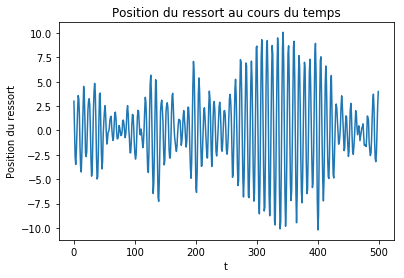

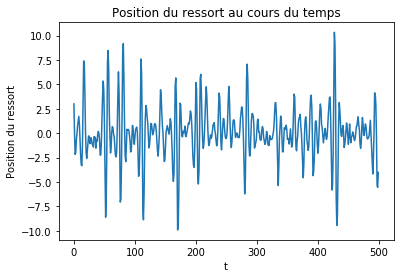

In [3]:
V = simu_ressort.compute_ressort(T, dt, V_0=3, V_1=0, F=.1, k=0.5, Vmin=0.1, Vmax=4, noise=True, sigma=0.5)
simu_ressort.plot_ressort(V)

V2 = simu_ressort.compute_ressort(T, dt, V_0=3, V_1=0, F=.4, k=0.5, Vmin=0.1, Vmax=4, noise=True, sigma=0.5)
simu_ressort.plot_ressort(V2)

### Simuler plein de ressorts ayant le même jeu de paramètres avec des conditions initiales et un bruit différent

**Test:** Générer `N` simulations pour chaque jeu de paramètres: `(F, k)`, puis sauvegarder ces simulations dans `./data/ressort/simu.pkl` pour pouvoir les re-charger ensuite.

In [4]:
N = 100
list_F = [i/10 for i in range(10)]
list_k = [i/10 for i in range(10)]
list_Vmin = [0.5]
list_Vmax = [6]

simu_ressort.save_several_param_ressort(N, T, dt, list_k, list_F, list_Vmin, list_Vmax, path_save=None)

100 jeux de parametres chargés


In [5]:
# Load object
all_simus = simu_ressort.load_obj("./data/ressort/simus.pkl")

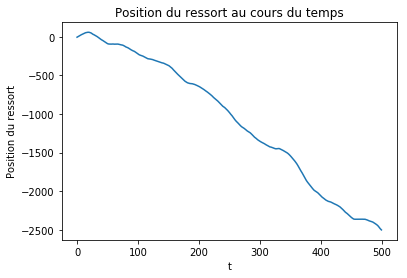

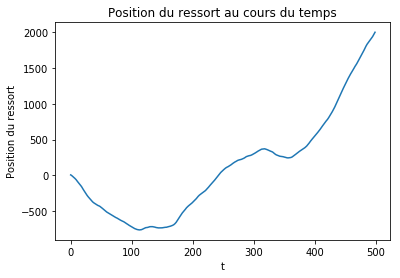

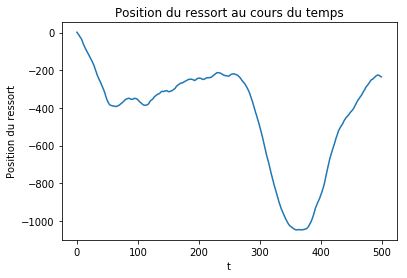

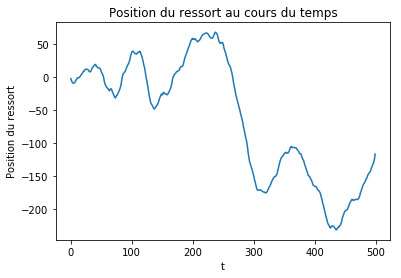

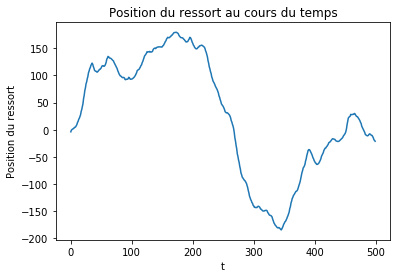

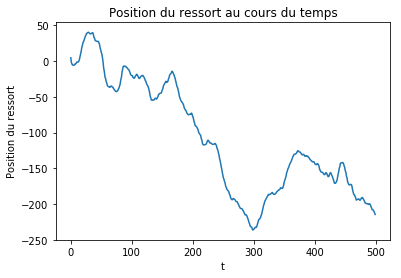

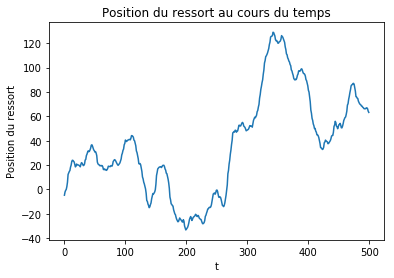

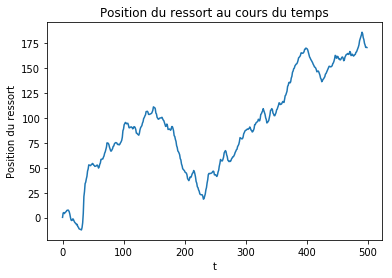

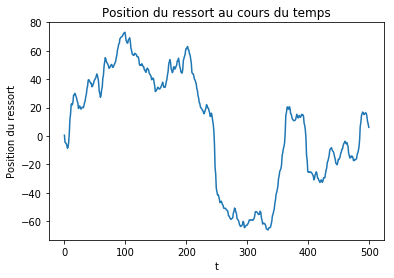

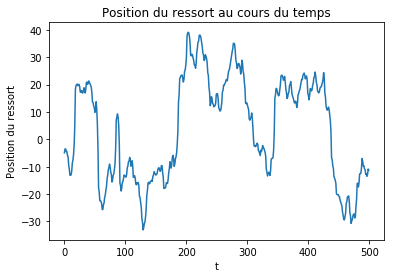

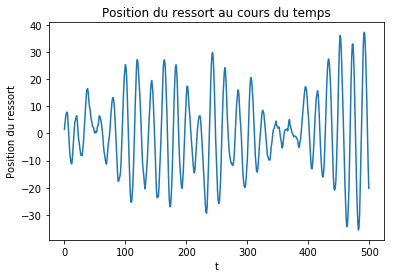

NameError: name 'item' is not defined

In [6]:
nb_plot = 1

# Plot
for item in all_simus:
    #for i in range(np.shape(item['simu'])[0]):
    for i in range(nb_plot):
        simu_ressort.plot_ressort(item['simu'][i, :], item['F'], item['k'], item['Vmin'], item['Vmax'])